## Challenge: Module 16-6 Sentiment Analysis with Naive Bayes
We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from scipy.stats import zscore
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# import text file and assigning separator based on raw file
df_yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header=None )
df_yelp.columns = ["customer_comments", "customer_rank"] # assigning column names
df_yelp.head()

,customer_comments,customer_rank
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
# create new dataframe to preserve original
df_yelp_2 = df_yelp.copy()

In [4]:
# general clean up script that was used in previous exercise. Formats strings to be similar style
spec_chars = ['__', ',', '(', ')', '/', '.', '"', '-','_', '  ' ]

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_yelp_2['customer_comments'] = df_yelp_2['customer_comments'].str.strip().str.replace(char, ' ')

In [5]:
df_yelp.info() # double checking nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
customer_comments    1000 non-null object
customer_rank        1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [6]:
# creating new boolean column of True/False.... we have a column of 1 and 0, but the example shows to do this in general cases.
df_yelp_2['positive'] = (df_yelp_2['customer_rank'] == 1)

# Note that if you run this cell a second time everything will become false.
# So... Don't.

df_yelp_2.head()

,customer_comments,customer_rank,positive
0,Wow Loved this place,1,True
1,Crust is not good,0,False
2,Not tasty and the texture was just nasty,0,False
3,Stopped by during the late May bank holiday of...,1,True
4,The selection on the menu was great and so wer...,1,True


In [7]:
# confirming how many positive reviews there are
df_yelp_pos = df_yelp_2[['customer_comments','customer_rank']].filter(df_yelp['customer_rank'] == 1)
df_yelp_pos = df_yelp_2[df_yelp.customer_rank !=0][['customer_comments','customer_rank']]
df_yelp_neg = df_yelp_2[df_yelp.customer_rank !=1][['customer_comments','customer_rank']]


print(df_yelp_pos.shape)
print(df_yelp_neg.shape)

(500, 2)
(500, 2)


In [8]:
# looking at frequency of words in the column to see if anything stands out
df_yelp_2.customer_comments.str.split(expand=True).stack().value_counts()

the            406
and            383
I              296
was            294
a              228
to             217
The            178
is             171
of             125
food           112
for            104
not            104
in             103
place          102
it             100
this            95
good            85
with            72
had             67
be              66
service         66
that            64
are             62
were            62
very            61
so              59
have            59
but             57
you             56
back            55
              ... 
Appetite         1
occasional       1
85               1
Mary             1
Han              1
quit             1
Favorite         1
winner!          1
cake             1
style!!          1
Sauce            1
typical          1
fabulous         1
andddd           1
saffron          1
accordingly      1
flop             1
gross            1
frustrated       1
toro             1
fiancé           1
Eve         

In [9]:
positive_words = ['best', 'great', 'good', 'amazing', 'nice', 'friendly', 'delicious', 'awesome','loved','love']
 
for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_yelp_2[str(key)] = df_yelp_2.customer_comments.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [10]:
# finding words with all caps and creating new column if true
df_yelp_2['allcaps'] = df_yelp_2.customer_comments.str.isupper()

In [11]:
# this must be run AFTER the all caps cell. This is done to normalize text formats to account for all versions of the same words.
df_yelp_2['customer_comments'] = df_yelp_2['customer_comments'].str.lower()

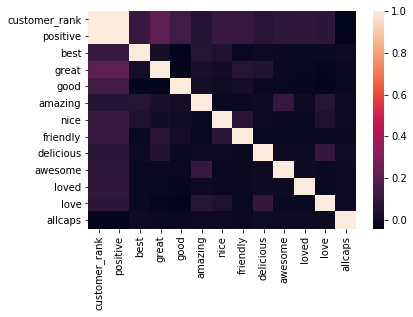

In [12]:
sns.heatmap(df_yelp_2.corr())

The good news is that not many of the words seem super correlated based on the heatmap.

In [13]:
# SKLearn requires us to specify an outcome (y/dependant variable) and 
# inputs (x/independent variables)

data = df_yelp_2[positive_words + ['allcaps']] # independent/inputs
target = df_yelp_2['positive'] # dependenty/outcome

In [14]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 360


### Trying on IMDB dataset

In [15]:
df_imdb = pd.read_csv('imdb_labelled.txt', sep='\t', header=None )
df_imdb.columns = ["customer_comments", "customer_rank"]
df_imdb.head()

,customer_comments,customer_rank
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [16]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
customer_comments    748 non-null object
customer_rank        748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [17]:
df_imdb_2 = df_imdb.copy()

In [18]:
# general clean up script that was used in previous exercise. Normalizes column names and removes special characters
spec_chars = ['__', ',', '(', ')', '/', '.', '"', '-','_', '  ' ]

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_imdb_2['customer_comments'] = df_imdb_2['customer_comments'].str.strip().str.replace(char, ' ')

In [19]:
df_imdb_2.head()

,customer_comments,customer_rank
0,A very very very slow moving aimless movie abo...,0
1,Not sure who was more lost the flat character...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1


In [20]:
df_imdb_2['positive'] = (df_imdb_2['customer_rank'] == 1)

# Note that if you run this cell a second time everything will become false.
# So... Don't.

df_imdb_2.head()

,customer_comments,customer_rank,positive
0,A very very very slow moving aimless movie abo...,0,False
1,Not sure who was more lost the flat character...,0,False
2,Attempting artiness with black & white and cle...,0,False
3,Very little music or anything to speak of,0,False
4,The best scene in the movie was when Gerardo i...,1,True


In [21]:
df_imdb_pos = df_imdb_2[['customer_comments','customer_rank']].filter(df_imdb['customer_rank'] == 1)
df_imdb_pos = df_imdb_2[df_imdb.customer_rank !=0][['customer_comments','customer_rank']]
df_imdb_neg = df_imdb_2[df_imdb.customer_rank !=1][['customer_comments','customer_rank']]


print(df_imdb_pos.shape)
print(df_imdb_neg.shape)

(386, 2)
(362, 2)


In [22]:
df_imdb_2.customer_comments.str.split(expand=True).stack().value_counts()

the             658
and             419
a               413
of              372
is              335
I               257
to              249
this            211
it              194
in              191
The             190
was             184
movie           174
film            155
that            150
0               140
1               121
for             101
as               90
with             87
This             76
on               75
are              75
one              70
you              65
but              64
bad              63
not              62
just             60
very             59
               ... 
Star              1
Adams'            1
hot               1
seamlessly        1
Olde              1
desert            1
sorry             1
Schultz           1
progresses        1
veteran           1
fulfilling        1
drifting          1
Shirley           1
network           1
Michael           1
receive           1
film?             1
latter            1
greatness         1


In [23]:
positive_words = ['best', 'great', 'good', 'amazing', 'nice', 'friendly', 'delicious', 'awesome','loved','love']
 
for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_imdb_2[str(key)] = df_imdb_2.customer_comments.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [24]:
df_imdb_2['allcaps'] = df_imdb_2.customer_comments.str.isupper()

In [25]:
df_imdb_2['customer_comments'] = df_imdb_2['customer_comments'].str.lower()

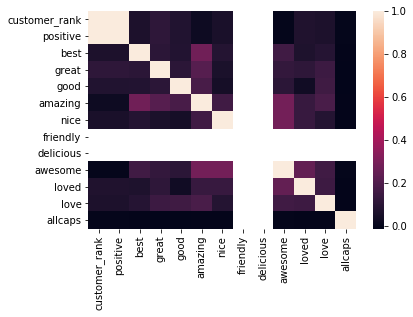

In [26]:
sns.heatmap(df_imdb_2.corr())

A couple words from the initial list don't exist here, and there might be some higher levels of correlation than in the yelp data set.

In [27]:
data = df_imdb_2[positive_words + ['allcaps']]
target = df_imdb_2['customer_rank']

In [28]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 326


IMDB didn't seem to have the same accuracy rate as the Yelp dataset. However, the amount of errors found were similar in total; and the available rows were less with IMDB than in Yelp. In addition, more variables seemed to be correlated than in the yelp data set.

### Trying on Amazon dataset

In [29]:
df_amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None )
df_amazon.columns = ["customer_comments", "customer_rank"]
df_amazon.head()

,customer_comments,customer_rank
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [30]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
customer_comments    1000 non-null object
customer_rank        1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [31]:
df_amazon_2 = df_amazon.copy()

In [32]:
# general clean up script that was used in previous exercise. Normalizes column names and removes special characters
spec_chars = ['__', ',', '(', ')', '/', '.', '"', '-','_', '  ' ]

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_amazon_2['customer_comments'] = df_amazon_2['customer_comments'].str.strip().str.replace(char, ' ')

In [33]:
df_amazon_2.head()

,customer_comments,customer_rank
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great,1


In [34]:
df_amazon_pos = df_amazon_2[['customer_comments','customer_rank']].filter(df_amazon['customer_rank'] == 1)
df_amazon_pos = df_amazon_2[df_amazon.customer_rank !=0][['customer_comments','customer_rank']]
df_amazon_neg = df_amazon_2[df_amazon.customer_rank !=1][['customer_comments','customer_rank']]


print(df_amazon_pos.shape)
print(df_amazon_neg.shape)

(500, 2)
(500, 2)


In [35]:
df_amazon_2['positive'] = (df_amazon_2['customer_rank'] == 1)

# Note that if you run this cell a second time everything will become false.
# So... Don't.

df_amazon_2.head()

,customer_comments,customer_rank,positive
0,So there is no way for me to plug it in here i...,0,False
1,Good case Excellent value,1,True
2,Great for the jawbone,1,True
3,Tied to charger for conversations lasting more...,0,False
4,The mic is great,1,True


In [36]:
df_amazon_2.customer_comments.str.split(expand=True).stack().value_counts()

the           415
I             309
and           308
is            243
it            217
a             208
to            197
this          151
phone         146
my            130
of            118
for           116
with          111
The           101
not            93
on             89
was            87
in             85
very           81
that           75
have           73
good           62
It             62
great          58
you            57
This           54
product        51
had            48
quality        43
headset        43
             ... 
reverse         1
renders         1
service!        1
transmit        1
somehow         1
instance        1
that?           1
JERKS           1
DAYS!!!         1
unlike          1
Pretty          1
neat            1
ill             1
carried         1
effects         1
BEING           1
functions       1
TWO             1
smartphone      1
designed        1
produce         1
WITH            1
card            1
covered         1
8125      

In [37]:
positive_words = ['best', 'great', 'good', 'amazing', 'nice', 'friendly', 'delicious', 'awesome','loved','love']
 
for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_amazon_2[str(key)] = df_amazon_2.customer_comments.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [38]:
df_amazon_2['allcaps'] = df_amazon_2.customer_comments.str.isupper()

In [39]:
df_amazon_2['customer_comments'] = df_amazon_2['customer_comments'].str.lower()

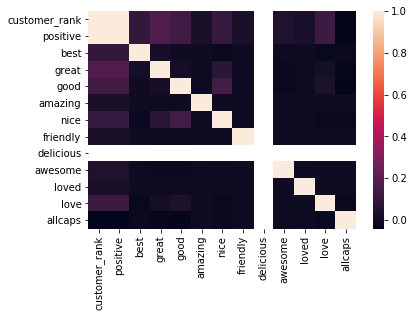

In [40]:
sns.heatmap(df_amazon_2.corr())

In [41]:
data = df_amazon_2[positive_words + ['allcaps']]
target = df_amazon_2['customer_rank']

In [42]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 403


### Amazon dataset showed a few extra errors found than in Yelp. Also, not all key words were found by comparison.

All-in-all, the models held up to some degree. The features I selected were general, positive expressions used in favorable reviews. Certain things like adding "!!!" to the end of some words might give some weight to how well the customers enjoyed whatever they were reviewing. However, this was simply positive vs negative, and I think that adding puncuation could also make the model messy because punctuations are used for negative reviews as well. 
It's clear that not every word is a catch-all for different settings, however, that just means that it might be good to start building a list to learn from using multiple sources. Also, consider the source of data and what the reviewers are discussing. 